# Movie Data Analysis

# Overview

For the following project we will  investigate data, to give recommendations to a business in how to insert their company in a new market. We will clean the data in order to make it more useful possible to get the results and the conclusions on how to make the first step into this new and unknown market.

# Business Problem

The company we will be making the analysis for is Microsoft. Which fundamentally is one of the biggest software companies in the world. They want to create a new movie studio. We will be helping them in getting valuable information that guides them into how to do this entrance in this new market. We will be analyzing the data in which Microsoft is responsible directly, and according to those results, we will help them to decide the type of films to create, directors to take into consideration, and the average budget there will be needed in order to make a film.

# The Data

The datasets we'll be using are taken for famous movie dedicated web pages that store important info we'll use for our report. We'll be using the following databases:

* **IMDb:** an abbreviation of: Internet Movie Database, as is name says, its an online database which allocates information related to films, television series, video games, and streaming content online. In its data they include important information that includes the ratings, cast, production crew, plot. It's one of the biggest film databases including 10.1 million of film titles.


* **Rotten Tomatoes:** is a review website in which critics give scores to the movies and series to get the audience what to expect in the new releases. This database has important info about general data in movies that will be needed for our analysis.


* **The Numbers:** is a Database which allocates info about budgets, and box office. It contains about 50.000 titles so it'll be a great help when building the data comparison in the different criteria we'll be exploring.

In the next cell, we're going to import the packages and libraries needed for getting the data and for the analysis:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
%matplotlib inline

Now, we're going to import the datasets that will be used in the analysis:

In [2]:
RT_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter="\t")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None
R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: rating, dtype: int64


Our first table it's a little bit limited because of the fact that it doesn't have the movie name, it only has an id, so it's a little bit tricky to join other tables that have information that can complement this table. The tables that have box office information only have movie titles and year. And the table which has the movie director and year doesn't have the budget. If we try to join the three tables we might have less results than 340 which were our quantity at first. For this analysis we're going to stick with the 340 rows.

In [3]:
RT_info = RT_info.dropna(subset=['box_office'])

In [4]:
RT_info['box_office'] = RT_info['box_office'].str.replace(r'\D+', '', regex=True).astype('float')

In [5]:
RT_info.drop(RT_info[(RT_info['rating'] == 'NC17') | (RT_info['rating'] == 'NR')].index, inplace=True)

In [6]:
RT_info = RT_info.set_index('id')

We dropped the Null values, and also a rating that only showed one time,because that information is irrelevant contrary to the other information we have. We needed too, to drop the NR rating which stands for "No Rated" because for the study we're doing that rating is also irrelevant, since it indicates that No Rate has been added to that movie at the time the data was taken. That information doesn't add value to our analysis.

We grouped our data in the first analysis we're interested in: Box Office per rating. The rating present in our data is the following:

* **G:** General
* **PG:** Parental Guidance Suggested
* **PG-13:** Parents Strongly Cautioned (Kids 13 and older no need supervision)
* **R:** Restricted (17 years old and older no need supervision)

The average box office showing next it's only domestic data.

''

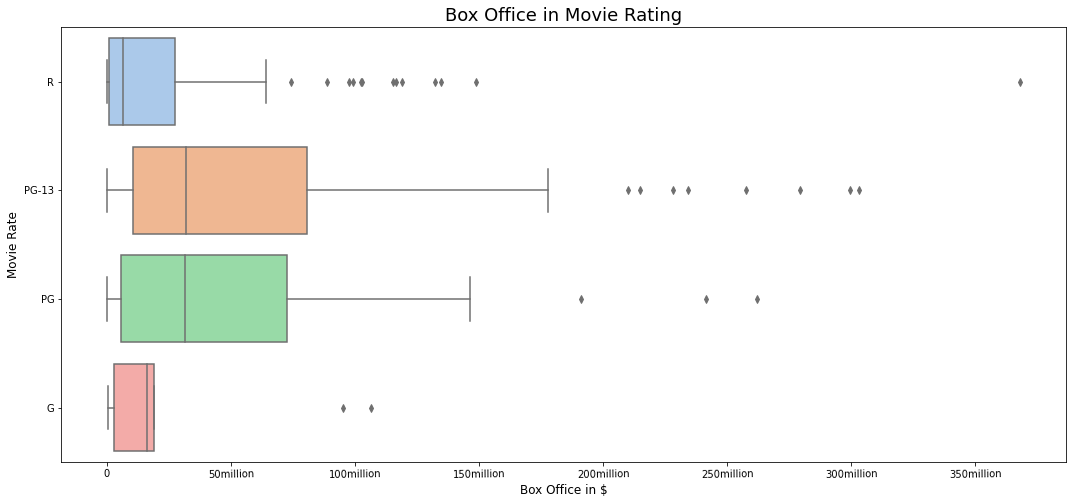

In [7]:
box_vs_rate = plt.figure(figsize=(18,8))
box_vs_rate_ax = sns.boxplot(data = RT_info, x='box_office', y='rating', palette='pastel')
box_vs_rate_ax.tick_params(axis='x', labelrotation = 1)
box_vs_rate_ax.set_title('Box Office in Movie Rating', size=18)
box_vs_rate_ax.set_xlabel('Box Office in $', size=12)
box_vs_rate_ax.set_ylabel('Movie Rate', size=12)
ticks1 = [0,0.5e8,1e8,1.5e8,2e8, 2.5e8, 3e8, 3.5e8]
ticks2 = ["0", "50million", "100million", "150million", "200million", "250million", "300million", "350million"]
box_vs_rate_ax.xaxis.set_label_coords(0.5, -0.05)
plt.xticks(ticks1, ticks2, rotation = 1)
;

## Average Box Office per rating

In the previous box plot we can observe how the mean in PG-13 rate and PG is quite basically the same. That implicates that in our sample, both rates will have in average the same return in the box office. One of the visible differences is that the PG-13 distribution is a little bigger and that difference it's in favor of the box office. Also, PG-13 has a little more of outliners than the PG.

One could say that, in terms of rating, the fact that having movies rated for a bigger audience (e.g. G: general rated movies) can assure that more people will be able to go and watch it. But in the graph we can observe that not necessarily because it's suitable for all audiences, it can translate into a bigger box office, because the movies that are PG-13 (which are for kids 13 and older) follow by the PG are the ones that on average, do better in the box office.

In [8]:
! unzip -n zippedData/im.db.zip
conn = sqlite3.connect("im.db")

Archive:  zippedData/im.db.zip


In [9]:
IMbd_basics = pd.read_sql("""
SELECT movie_id, original_title, start_year, genres, primary_name, person_id, primary_title, death_year
FROM persons
JOIN directors
    USING(person_id)
JOIN movie_basics
    USING(movie_id)
GROUP BY movie_id
;""", conn)

In [10]:
TN_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

In [11]:
TN_budgets['production_budget'] = TN_budgets['production_budget'].str.replace(r'\D+', '', regex=True).astype('float')
TN_budgets['domestic_gross'] = TN_budgets['domestic_gross'].str.replace(r'\D+', '', regex=True).astype('float')
TN_budgets['worldwide_gross'] = TN_budgets['worldwide_gross'].str.replace(r'\D+', '', regex=True).astype('float')
TN_budgets['year'] = pd.DatetimeIndex(TN_budgets['release_date']).year

The second analysis we'll be working on, is box office and movie genres. To get this data, we have to merge two databases which have info about movie genres and the box office from domestic and worldwide gross.

In [12]:
revenue_genre = IMbd_basics.merge(TN_budgets, left_on=['primary_title', 'start_year'], right_on=['movie' , 'year'], how='inner')

In [13]:
revenue_genre['genre_1'] = revenue_genre['genres'].str.split(',')

In [14]:
revenue_genre = revenue_genre.explode('genre_1')

In [16]:
revenue_genre.drop(revenue_genre[revenue_genre['genre_1'] == "Reality-TV"].index, inplace = True)

The genre `Reality_TV` has only one result, in order to make our graph more readable with important data, we're dropping the row which has that genre. Also, we're adding a new column called `international_gross` which will be the `worldwide_gross` less the `domestic_gross` so we can make a bar stacked graph that will help us to correctly visualize the proportion of the domestic gross vs the foreign.

In [17]:
revenue_genre['international_gross'] = revenue_genre['worldwide_gross'] - revenue_genre['domestic_gross'] 

Next, we're dropping some columns that won't be needed right now for the graph we're building.

In [18]:
box_by_genre = revenue_genre.drop(['id', 'start_year', 'production_budget', 'worldwide_gross', 'death_year', 'year'], axis=1)

In [19]:
box_by_genre = box_by_genre.groupby(['genre_1']).mean().round(1).sort_values(by='international_gross', ascending = False)

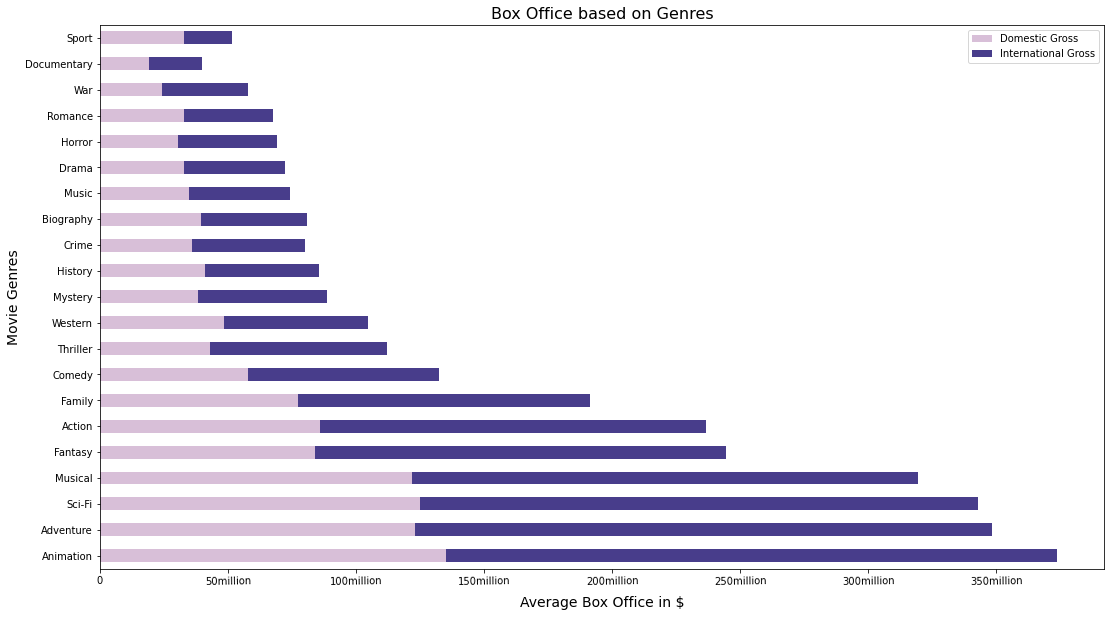

In [20]:
ax2 = box_by_genre.plot(kind='barh', figsize=(18,10),  stacked=True, color=['thistle', 'darkslateblue'])
plt.title('Box Office based on Genres', size=16)
ax2.set_xlabel('Average Box Office in $', size=14)
ax2.xaxis.set_label_coords(0.5, -0.05)
ax2.set_ylabel('Movie Genres', size=14)
ax2.legend(['Domestic Gross', 'International Gross'])
ticks1 = [0,0.5e8,1e8,1.5e8,2e8, 2.5e8, 3e8, 3.5e8]
ticks2 = ["0", "50million", "100million", "150million", "200million", "250million", "300million", "350million"]
plt.xticks(ticks1, ticks2, rotation = 1)
plt.show();

# Average Box Office based on movie genre

When comparing the average box office by the movie genres, we can visualize that the movie genres which have the bigger box office in the domestic + rest of the world are *Animation, Adventure, Musical & Sci-Fi*. These genres of movies, or the blend of two of them, can implicate a bigger box office in comparison with the rest, so they represent a great opportunity to take into account when choosing the genre of the new film. In average these 4 genres make a 350million dolars box office.

In [22]:
revenue_dir = IMbd_basics.merge(TN_budgets, left_on=['primary_title', 'start_year'], right_on=['movie' , 'year'], how='inner')
revenue_dir.drop_duplicates(subset =['production_budget', 'primary_name'], keep = 'first', inplace = True)
revenue_dir = revenue_dir[revenue_dir['death_year'].isnull()]
revenue_dir['revenue'] = revenue_dir['worldwide_gross'] - revenue_dir['production_budget'] 
top_30 = revenue_dir.groupby(['primary_name', 'movie']).mean().round(1).sort_values(by='revenue', ascending = False)
revenue_dir = revenue_dir.drop(['id', 'start_year', 'domestic_gross', 'worldwide_gross', 'death_year', 'year'], axis=1)
box_by_director = revenue_dir.groupby(['primary_name']).mean().round(1).sort_values(by='revenue', ascending = False)

In [23]:
graph = box_by_director.head(30)

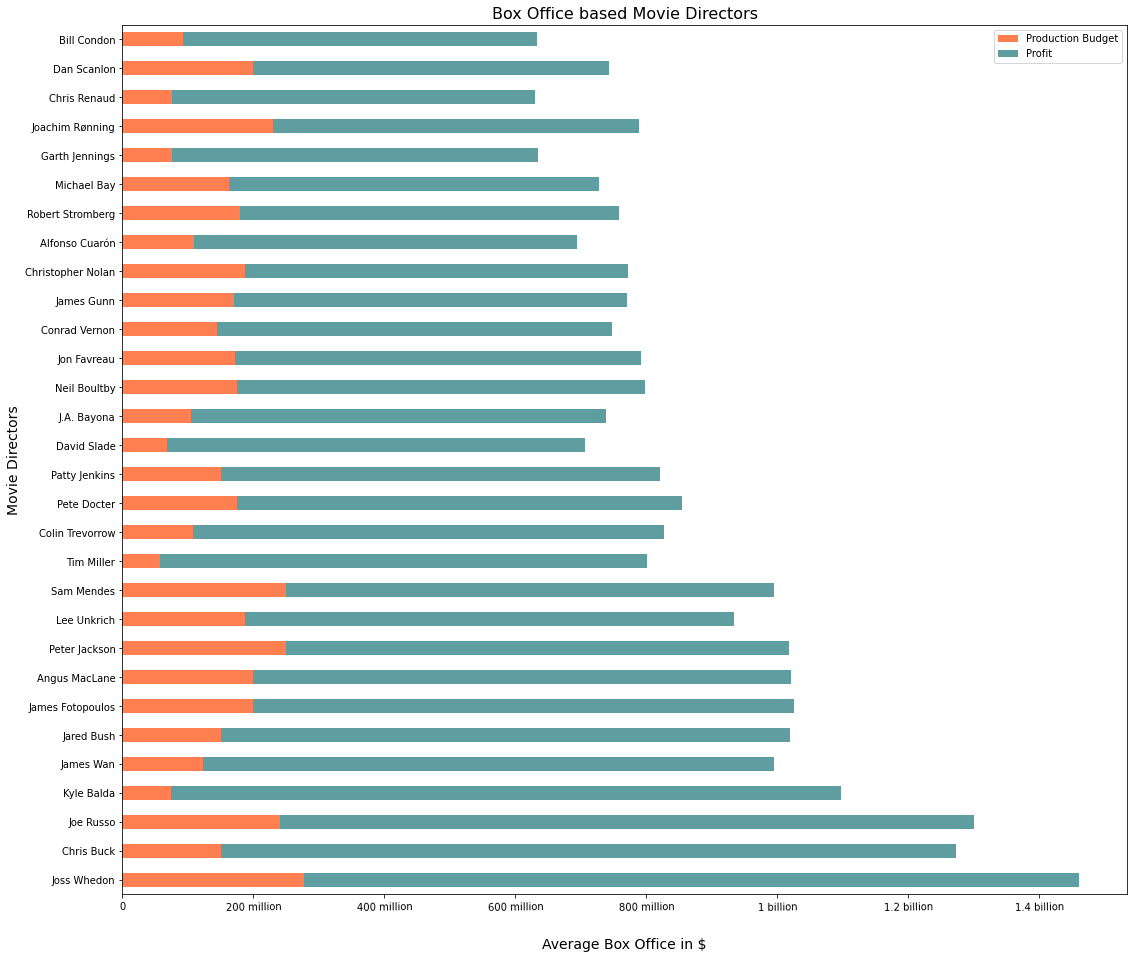

In [24]:
ax3 = graph.plot(kind='barh', figsize=(18,16), stacked = True, color=["coral", "cadetblue"])
plt.title('Box Office based Movie Directors', size=16)
ax3.set_xlabel('Average Box Office in $', size=14)
ax3.set_ylabel('Movie Directors', size=14)
ax3.legend(['Production Budget', 'Profit'])
ax3.xaxis.set_label_coords(0.5, -0.05)
ticks3 = [0,0.2e9,0.4e9,0.6e9,0.8e9, 1e9, 1.2e9, 1.4e9]
ticks4 = ["0", "200 million", "400 million", "600 million", "800 million", "1 billion", '1.2 billion', '1.4 billion']
plt.xticks(ticks3, ticks4, rotation = 1)
plt.show();

For this analysis, we will have to take care of two important things. The first one, is to take out the directors that have passed away. And the second, it's doing the merge by using two columns that match. In the two tables, we have two columns that match, so in order to avoid mistakes when joining the box office and the titles, we're going to use the year column, and the original movie title, so we can be sure that the movies with the same name, release in different years have the correct box office. We will take into account the movie directors and the average box office they had. For this analysis we will be working with the top 30 directors. 

# Average Box Office based on movie directors

When checking box office vs movie directors, we can observe how we have plenty of directors to choose in which the key difference it's what they can achieve with the budget given. at simple sight Joss Whedon, director of "The Avengers" and "Age of Ultron" it's one of the biggest in the average box office following by Chris Buck ('Frozen, Disney'), Joe Russo ('Avengers Infinity War') and Kyle Balda ('Despicable Me 3'). What do these movies have in common? Genres are: animation, Sci-Fi and adventure, three of the 4 most genres with the biggest in average box office. These 4 directors need an average of 196 million dollars to make a box office movie.

If we take into account the budgets, the directors with the smallest budget and an important revenue on average are Garth Jennings ('Sing'), Tim Miller ('Deadpool'), Kyle Balda ('Minions'), and Chris Renaud ('The Secret Life of Pets'). They have in common the same 4 genres present in top box office genres: adventure, musical, and animation. For these directors the average for a box office movie is 73million dollars.

In [27]:
IMbd_writers = pd.read_sql("""
SELECT movie_id, original_title, start_year, genres, primary_name, person_id, primary_title, death_year
FROM persons
JOIN writers
    USING(person_id)
JOIN movie_basics
    USING(movie_id)
GROUP BY movie_id
;""", conn)

In [28]:
revenue_wri = IMbd_writers.merge(TN_budgets, left_on=['primary_title', 'start_year'], right_on=['movie' , 'year'], how='inner')
revenue_wri.drop_duplicates(subset =['production_budget', 'primary_name'], keep = 'first', inplace = True)
revenue_wri = revenue_wri[revenue_wri['death_year'].isnull()]
revenue_wri = revenue_wri.drop(['id', 'start_year', 'domestic_gross', 'death_year', 'year', 'production_budget'], axis=1)
box_by_wri = revenue_wri.groupby(['primary_name']).mean().round(1).sort_values(by='worldwide_gross', ascending = False)

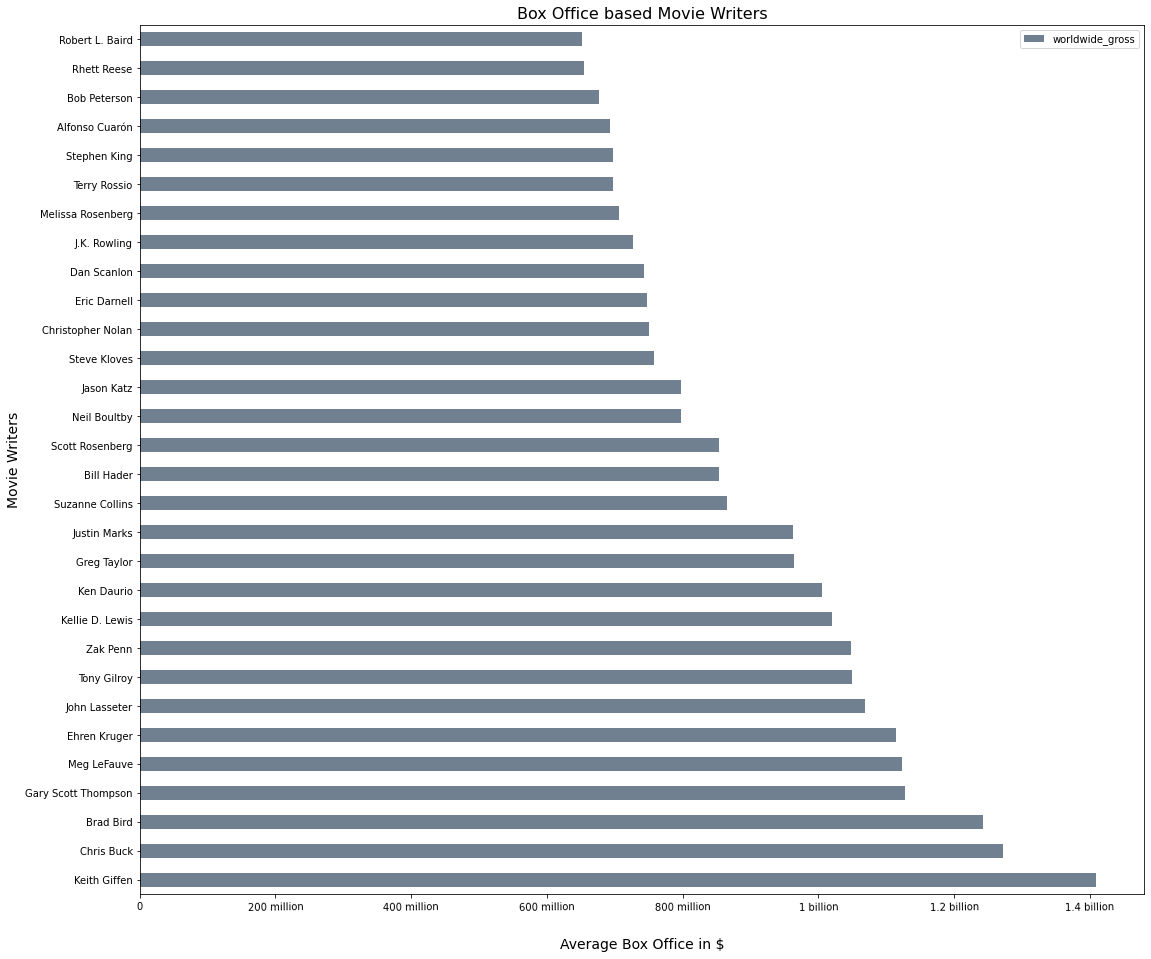

In [34]:
ax5 = box_by_wri.head(30).plot(kind='barh', figsize=(18,16), color=('slategrey'))
plt.title('Box Office based Movie Writers', size=16)
ax5.set_xlabel('Average Box Office in $', size=14)
ax5.set_ylabel('Movie Writers', size=14)
ax5.xaxis.set_label_coords(0.5, -0.05)
ticks9 = [0,0.2e9,0.4e9,0.6e9,0.8e9, 1e9, 1.2e9, 1.4e9]
ticks10 = ["0", "200 million", "400 million", "600 million", "800 million", "1 billion", '1.2 billion', '1.4 billion']
plt.xticks(ticks9, ticks10, rotation = 1)
plt.show();

# Average Box Office and Movie Writers

Last but not least,  we'll need a good writer, one that can make a combo with a top box office director plus a writer. This can build a really good film, let's recall that there's no good movie with only a good director because what makes a really good movie it's also the content. As we can observe in the previous graph, the top three directors, Keith Giffen, Chris Buck and Brad Bird, are movie directors also. For this new movie we should join the number 1 director according to the sample data results plus the number 1 writer who is Keith Giffen.

# Conclusion & recommendations

With all the information we gathered in this studio, we could find three recommendations to take into account, so Microsoft's new studio could make a new movie that's going to be very successful in the box office.

The first attribute that Microsoft will have to consider is, to make a movie within the rates that have on average a bigger revenue. Our results shows the movies that got most revenue in average, are PG and PG-13, having PG-13 an advantage over the PG, because we had a lot of outlines in PG-13 and the distribution was bigger in favor of a major box office, this tell us there's is a possibility that having a movie within this rating, can achieve a bigger box office than the average in the PG-13 rate.

The second attribute to consider is the genre that will be used. In our results we could appreciate that the majority of the movies have 2 to 3 genres. The genres that in general have bigger revenue are: animation, adventure, musicals and Sci-Fi. So it's a real opportunity to make this movie using 2 or 3 of these genres because according to our analysis they could make a movie with an average revenue of 350 million dollars.

The third is the movie director. We took for our database 4 directors that have the most revenue on average per movie but we also investigated top directors that have used less budget and had an important revenue in the movies, so basically it's up to the budget Microsoft is willing to invest in the first film. But for the top 4 directors we have: Joss Whedon, Chris Buck, Joe Russo and Kyle Balda. Microsoft needs to be aware that the production budget for the top 30 directors on average is 150million dollars so that's the approximate they will need to invest for the new film. 

The last attribute will be the partner for our director, in our graph we could observe a lot of movie writers, that would be a great choice, but for our success in this movie we will stick with the number one, who is Keith Giffen according to our analysis.

### It is really a rentable business building a new studio?

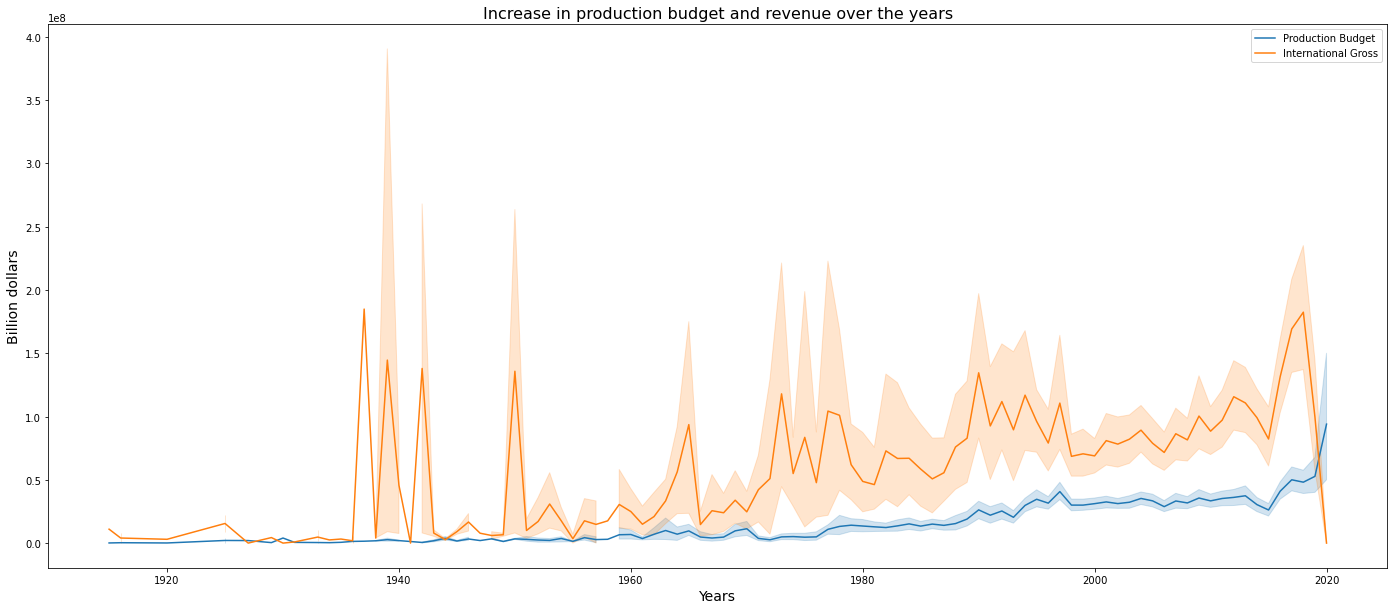

In [36]:
fig4, ax4 = plt.subplots(figsize=(24,10))
sns.lineplot(data=TN_budgets, x="year", y="production_budget", palette='bright')
sns.lineplot(data=TN_budgets, x="year", y="worldwide_gross", palette='rocket')
plt.title('Increase in production budget and revenue over the years', size=16)
plt.xlabel('Years', size=14)
plt.ylabel('Billion dollars', size=14)
ax4.legend(['Production Budget', 'International Gross'])

plt.show();

The graph shown before says it is. We can observe how with the years go by, the budget used may increase, but the revenue is always increasing proportionally and in the majority always the revenue it's bigger than the budget used.

Microsoft's new studio should make a movie with at least 150 million budget if directed by Joss Whedon or 73 million budget if directed by Garth Jennings. This film should be a PG-13 movie and it has to be an Adventure + Animation movie. According to the analysis this new movie will be a total success.

In [31]:
conn.close()

# Attribution

[1] https://www.imdb.com/

[2] https://www.rottentomatoes.com/

[3] https://www.the-numbers.com/